# <b><p style="background-color: #ff6200; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Task 27-> Evaluation Techniques for classification models</p>

Evaluation techniques are crucial in assessing the performance of models. They help determine how well the model predicts the dependent variable based on the independent variables. Proper evaluation ensures that the model is reliable and can generalize well to new, unseen data. Here, we discuss the key evaluation metrics used in Classification analysis and their importance.

### Techniques Implemented
1. [Confusion Matrix](#1)
2. [Accuracy](#2)
3. [Precision](#3)
4. [Recall (Sensitivity)](#4)
5. [F1 Score](#5)
6. [ROC Curve](#6)
7. [AUC (Area Under the Curve)](#7)
8. [Cross-Validation](#8)
9. [Classification Report](#9)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
social = pd.read_csv("Social_Network_Ads.csv", usecols=lambda column: column != 'User ID')
social['Gender'] = social['Gender'].map({'Male': 0, 'Female': 1})
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = social[['Age', 'EstimatedSalary']]
y = social['Purchased']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [4]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

<a id=1></a>
## <b><span style='color:#fcc36d'> Confusion Matrix </span>

The confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a detailed breakdown of the actual versus predicted classifications made by a model. Here is an in-depth explanation of the confusion matrix and how to interpret it.
A confusion matrix is typically structured as a square matrix with the following layout:

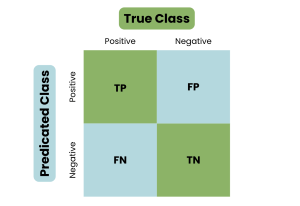

Each cell in the matrix has the following meaning:
- True Positive (TP): The number of instances correctly predicted as positive.
- True Negative (TN): The number of instances correctly predicted as negative.
- False Positive (FP): The number of instances incorrectly predicted as positive (Type I error).
- False Negative (FN): The number of instances incorrectly predicted as negative (Type II error).

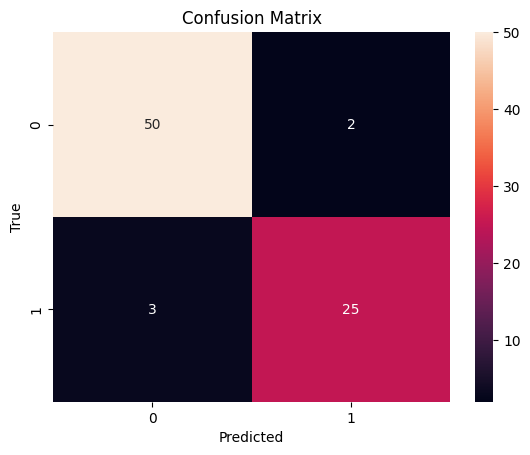

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title(f"Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<a id=2></a>
## <b><span style='color:#fcc36d'> Accuracy </span>

Accuracy is one of the simplest and most commonly used metrics for evaluating classification models. It measures the proportion of correctly classified instances out of the total instances. Accuracy provides a general sense of how often the model is correct.
Described as:

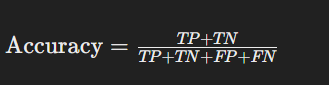

Where: 
- 𝑇𝑃(True Positives) are the instances correctly predicted as positive.
- 𝑇𝑁(True Negatives) are the instances correctly predicted as negative.
- 𝐹𝑃(False Positives) are the instances incorrectly predicted as positive.
- 𝐹𝑁(False Negatives) are the instances incorrectly predicted as negative.
### Interpretation
- High Accuracy: Indicates that the model is performing well and making correct predictions most of the time.
- Low Accuracy: Indicates that the model is performing poorly and making incorrect predictions frequently.

In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9375


<a id=3></a>
## <b><span style='color:#fcc36d'> Precision </span>

Precision is a metric that measures the accuracy of positive predictions made by the model. It indicates the proportion of true positive predictions out of all the positive predictions made by the model. Precision is particularly useful when the cost of false positives is high.
The formula for precision is:

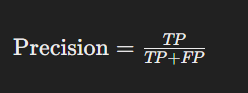

Where:

- 𝑇𝑃(True Positives) are the instances correctly predicted as positive.
- 𝐹𝑃(False Positives) are the instances incorrectly predicted as positive.
## Interpretation
- High Precision: Indicates that the model makes very few false positive predictions. This means that when the model predicts a positive instance, it is usually correct.
- Low Precision: Indicates that the model makes many false positive predictions. This means that the model often incorrectly predicts positive instances.
## Considerations
- Relevance in Imbalanced Datasets: Precision is particularly important in scenarios where false positives are more critical to avoid than false negatives. For example, in spam detection, a false positive (marking a legitimate email as spam) can be more - problematic than a false negative (missing a spam email).
- Trade-off with Recall: Precision and recall are often in a trade-off. Increasing precision can lead to a decrease in recall and vice versa. This trade-off is often managed using the F1 score.

In [7]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:}")

Precision: 0.9259259259259259


<a id=4></a>
## <b><span style='color:#fcc36d'> Recall (Sensitivity) </span>

Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify all positive instances. It indicates the proportion of true positive predictions out of all actual positive instances. Recall is particularly useful when the cost of false negatives is high.

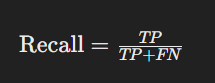

Where:

- 𝑇𝑃(True Positives) are the instances correctly predicted as positive.
- 𝐹𝑁(False Negatives) are the instances incorrectly predicted as negative.
## Interpretation
- High Recall: Indicates that the model correctly identifies most of the actual positive instances. This means the model has a low number of false negatives.
- Low Recall: Indicates that the model misses many actual positive instances. This means the model has a high number of false negatives.
## Considerations
- Relevance in Imbalanced Datasets: Recall is particularly important in scenarios where false negatives are more critical to avoid than false positives. For example, in disease diagnosis, a false negative (missing a disease case) can be more problematic than a false positive (incorrectly diagnosing a healthy person with the disease).
- Trade-off with Precision: Recall and precision are often in a trade-off. Increasing recall can lead to a decrease in precision and vice versa. This trade-off is often managed using the F1 score.

In [8]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

Recall: 0.8928571428571429


<a id=5></a>
## <b><span style='color:#fcc36d'> F1 Score </span>

The F1 Score is the harmonic mean of precision and recall. It provides a single metric that balances both the concerns of precision and recall, making it especially useful for evaluating models on imbalanced datasets where one class may be more frequent than the other.

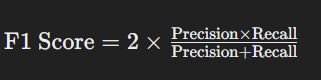

Where:
- Precision is the ratio of true positives to the sum of true positives and false positives.
- Recall is the ratio of true positives to the sum of true positives and false negatives.

##Interpretation
- High F1 Score: Indicates a balance between precision and recall, with both being high.
- Low F1 Score: Indicates that either precision or recall or both are low.
## Considerations
- Balanced Measure: The F1 Score is useful when you need a balance between precision and recall and there is an uneven class distribution.
- Limitations: It may not provide a full picture of model performance on its own. It should be used alongside other metrics like accuracy, precision, and recall for a comprehensive evaluation.


In [9]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.9090909090909091


<a id=6></a>
## <b><span style='color:#fcc36d'> ROC Curve (Receiver Operating Characteristic Curve) </span>

The ROC Curve is a graphical representation that illustrates the diagnostic ability of a binary classification model. It plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under this curve (AUC) is often used to summarize the model's performance.

True Positive Rate (TPR) and False Positive Rate (FPR)
- True Positive Rate (TPR): Also known as Recall or Sensitivity, it is the ratio of correctly predicted positive instances to all actual positives.

  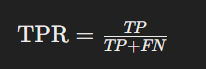
  
- False Positive Rate (FPR): It is the ratio of incorrectly predicted positive instances to all actual negatives.

    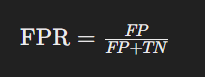

  
## ROC Curve Interpretation
- ROC Curve Position: A model with a good predictive ability will have an ROC curve that hugs the top left corner of the plot.
Diagonal Line: A model with no discrimination ability (random guessing) will have an ROC curve that is a 45-degree diagonal line from the bottom left to the top right.
- Area Under the Curve (AUC): The AUC provides a single number summary of the ROC curve. AUC ranges from 0 to 1, where 1 indicates a perfect model and 0.5 indicates a model with no discrimination ability.

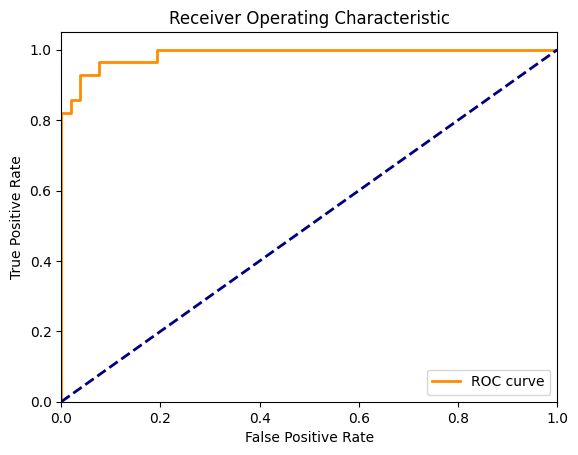

In [10]:
from sklearn.metrics import roc_curve, auc

y_prob = naive_bayes.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<a id=7></a>
## <b><span style='color:#fcc36d'> AUC (Area Under the Curve) </span>

AUC, or Area Under the ROC Curve, is a single scalar value that summarizes the performance of a binary classification model. It represents the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance by the model.

### Interpretation
- AUC = 1: Perfect model.
- AUC = 0.5: Model has no discrimination ability (equivalent to random guessing).
- AUC < 0.5: Model performs worse than random guessing.

In [11]:
from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

AUC: 0.9869505494505495


<a id=8></a>
## <b><span style='color:#fcc36d'> Cross-Validation </span>

Cross-validation is a statistical method used to estimate the skill of a model on unseen data. It is primarily used to assess how a predictive model will generalize to an independent dataset. This is achieved by partitioning the data into subsets, training the model on some subsets while testing it on the remaining subsets.

## Types of Cross-Validation
- **K-Fold Cross-Validation:**

    - The data is divided into k equally sized folds.
    - The model is trained on k-1 folds and tested on the remaining fold.
    - This process is repeated k times, each time with a different fold as the test set.
    - The results are averaged to provide a single estimation of model performance.

- **Stratified K-Fold Cross-Validation:**

Similar to K-Fold Cross-Validation, but it ensures that each fold has the same proportion of class labels as the original dataset.
This is particularly useful for imbalanced datasets.
- **Leave-One-Out Cross-Validation (LOOCV):**

A special case of K-Fold Cross-Validation where k is set to the number of data points in the dataset.
Each instance is used once as a test set, and the rest as the training set.
This method is computationally expensive but useful for small datasets.
- **Repeated K-Fold Cross-Validation:**

Repeats the K-Fold Cross-Validation process multiple times with different splits.
Provides a more robust estimate of model performance by reducing variability.
## Benefits
- Reduces Overfitting: By training and testing the model on different subsets, cross-validation provides a more realistic estimate of model performance.
- Utilizes Data Efficiently: Unlike a single train-test split, cross-validation uses all data points for both training and testing, ensuring that no data is wasted.

In [12]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(naive_bayes, X, y, cv=kf)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")
print(f"Standard Deviation of CV Score: {cv_scores.std()}")

Cross-Validation Scores: [0.925  0.9    0.8875 0.8375 0.8875]
Mean CV Score: 0.8875
Standard Deviation of CV Score: 0.028504385627478455


<a id=9></a>
## <b><span style='color:#fcc36d'> Classification Report </span>

A classification report is a detailed performance analysis of a classification model. It provides key metrics, including precision, recall, F1 score, and support for each class. This comprehensive summary helps in understanding the model's strengths and weaknesses across different classes.

## Key Metrics
- **Precision:** The ratio of true positive predictions to the total predicted positives. It measures the accuracy of positive predictions.

    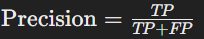

- **Recall (Sensitivity):** The ratio of true positive predictions to the total actual positives. It measures the model's ability to identify positive instances.

  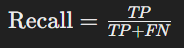

  
- **F1 Score:** The harmonic mean of precision and recall. It balances the two metrics, especially useful for imbalanced datasets.

  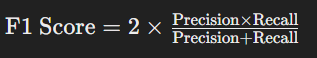

  
- **Support:** The number of actual occurrences of each class in the dataset.

In [13]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80

